# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the `whale_analysis.ipynb` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

%matplotlib inline


In [11]:
year_trading_days = 252


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_navs_df = pd.read_csv("./Resources/whale_navs.csv",
                            index_col="date",
                            parse_dates=True,
                            infer_datetime_format=True,)

display(whale_navs_df.head())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns = whale_navs_df.pct_change().dropna()
daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

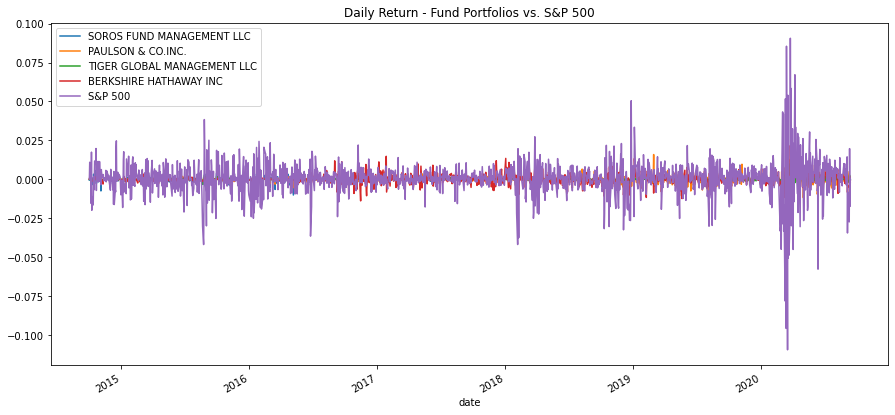

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(15,7), title="Daily Return - Fund Portfolios vs. S&P 500");


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.tail(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

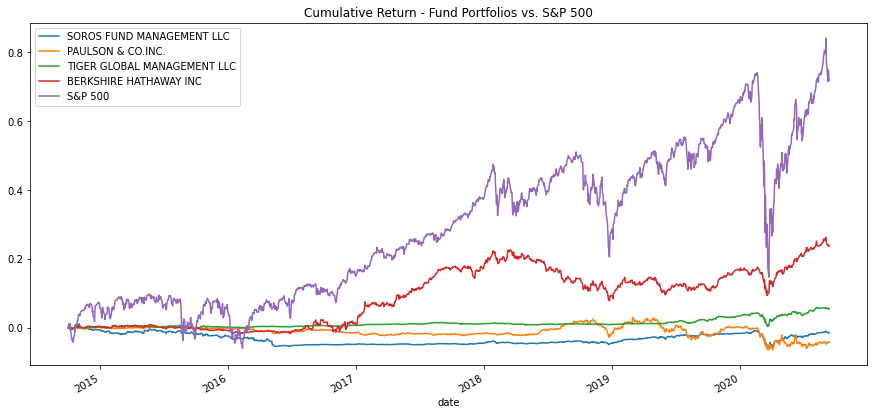

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(15,7), title="Cumulative Return - Fund Portfolios vs. S&P 500");


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** Based on the cumulative return data and the visualization, none of the fund portfolios appear to outperform the S&P.


---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

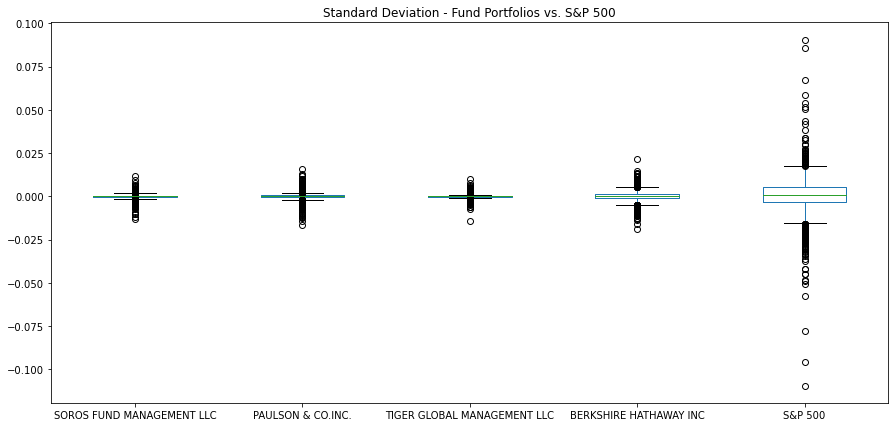

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot.box(figsize=(15,7), title="Standard Deviation - Fund Portfolios vs. S&P 500");


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

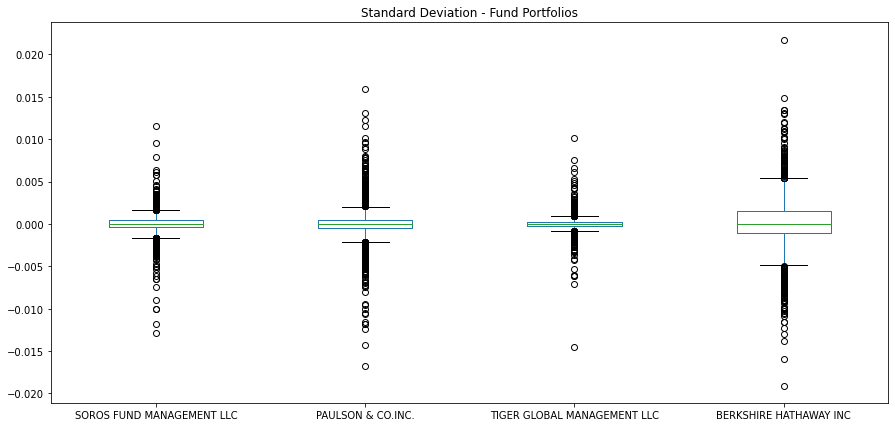

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
fund_portfolio_daily_returns = daily_returns.drop(columns=["S&P 500"])
fund_portfolio_daily_returns.plot.box(figsize=(15,7), title="Standard Deviation - Fund Portfolios");


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Based on the box plot visualization of just the four fund portfolios, Berkshire Hathaway Inc appears to be the most volatile, and Tiger Global Management LLC appears to maintain the smallest spread.


---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
daily_standard_deviation = daily_returns.std().sort_values()
daily_standard_deviation


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [12]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_standard_deviation = daily_standard_deviation * np.sqrt(year_trading_days)
annualized_standard_deviation


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

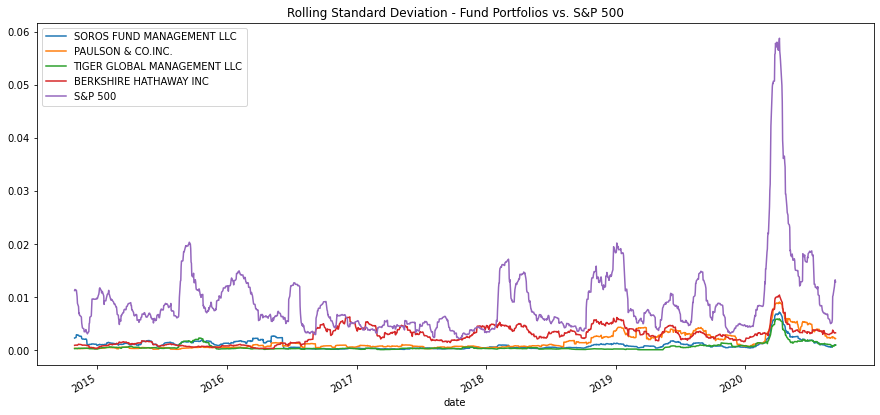

In [13]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().plot(
    figsize=(15,7),
    title="Rolling Standard Deviation - Fund Portfolios vs. S&P 500",
);


#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

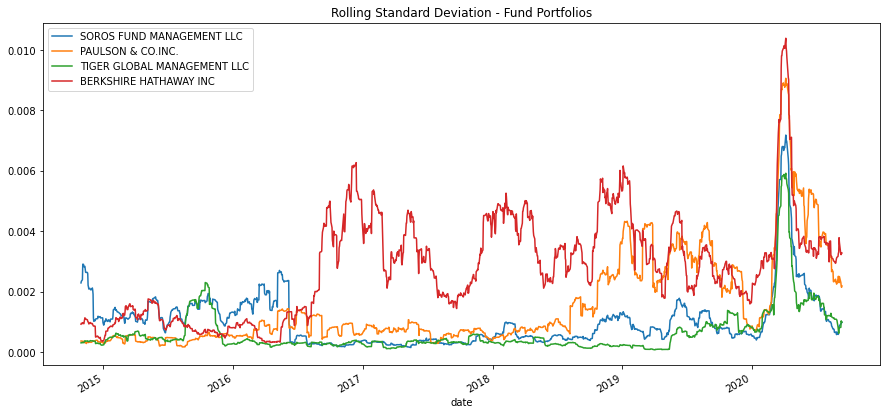

In [14]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
fund_portfolio_daily_returns.rolling(window=21).std().plot(
    figsize=(15,7),
    title="Rolling Standard Deviation - Fund Portfolios",
);


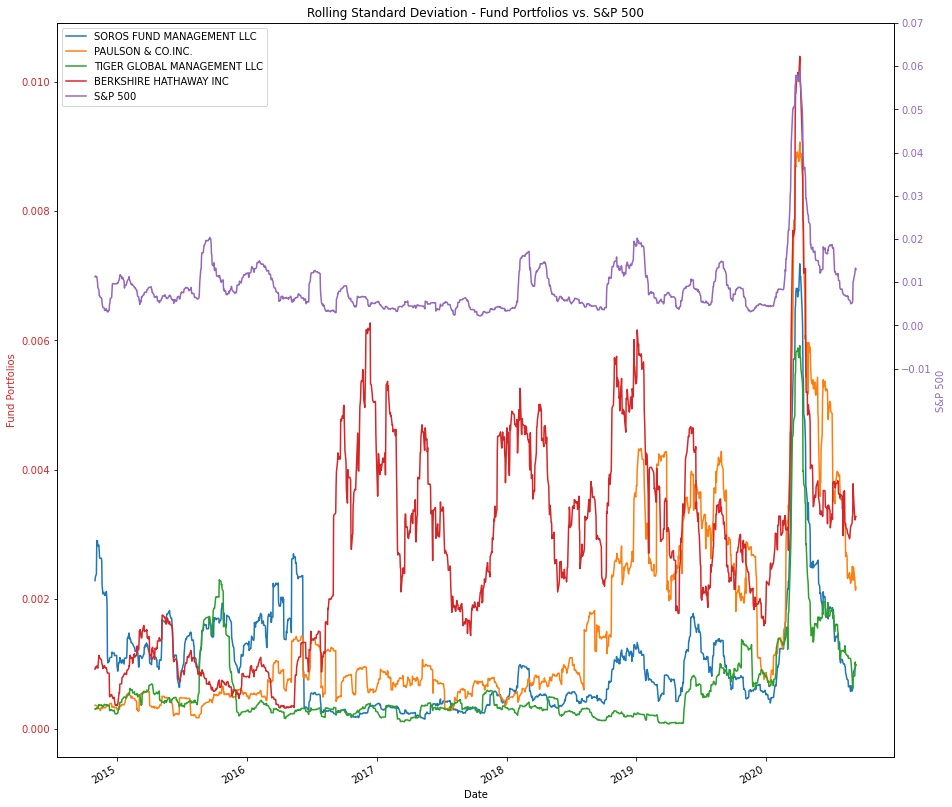

In [15]:
"""
    Risk comparison of each portfolio increase versus risk of the S&P 500.
"""

fig, ax1 = plt.subplots()
ax2      = ax1.twinx()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_fund_portfolios = len(fund_portfolio_daily_returns.columns)

# Fund Portfolio Axis (Y-Axis on Left)
color = colors[num_fund_portfolios-1]
fund_portfolio_daily_returns.rolling(window=21).std().plot(
    ax=ax1,
    figsize=(15,15),
    title="Rolling Standard Deviation - Fund Portfolios vs. S&P 500",
);

ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Date")
ax1.set_ylabel("Fund Portfolios", color=color)

# Market Axis (Y-Axis on Right)
color = colors[num_fund_portfolios]
daily_returns["S&P 500"].rolling(window=21).std().plot(
    ax=ax2,
    color=color,
);

# Span Right Y-Axis to Data
yticks = ax2.get_yticks()
ax2.set_ylim(-0.1, 0.06)
ax2.set_yticks(yticks)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("S&P 500", color=color)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

lines  = lines1 + lines2
labels = labels1 + labels2

ax1.legend(lines, labels, loc=0);


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** Although between late 2016 to early 2018 Berkshire Hathaway Inc appears to maintain close volatility with the S&P 500, overall the S&P 500's volatility is noticeably higher than the other four fund portfolios. Therefore, none of the fund portfolios pose more risk than the S&P 500.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Based on the rolling metrics, the correlation of each portfolio's risk increase relative to the S&P 500's increase is somewhat consistent for Soros Fund Management LLC and Berkshire Hathaway Inc, but unreliable for most others except for instances of significant market volatility (e.g., March 2020 high volatility).

Paulson & Co. Inc does appear to somewhat track alongside the S&P 500, however the early segments of S&P 500 volatility do not appear to be present in the fund's results.

Tiger Global Management LLC only seems to track alongside the S&P 500 during periods of high volatility. It sometimes tracks alongside the S&P 500 during periods of relatively moderate volatility ($\sigma = 0.01 \pm0.01$)


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Based on the rolling standard deviations for the fund portfolios, although Berkshire Hathaway Inc has the best returns, it appears to maintain the highest level of volatility.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [16]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
average_annual_return_portfolio = daily_returns.mean() * year_trading_days
average_annual_return_portfolio


SOROS FUND MANAGEMENT LLC     -0.002281
PAULSON & CO.INC.             -0.006633
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [17]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios = (average_annual_return_portfolio / annualized_standard_deviation).sort_values()
sharpe_ratios


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

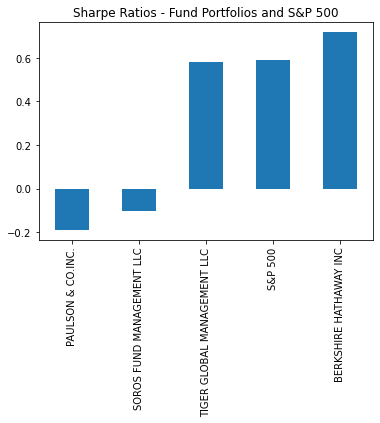

In [18]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot.bar(title="Sharpe Ratios - Fund Portfolios and S&P 500");


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** The best risk-return portfolio is Berkshire Hathaway Inc. The worst risk-return portfolio is Paulson & Co Inc.


---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [19]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
var_sp500_roll60 = daily_returns.loc[:,"S&P 500"].rolling(window=60).var().dropna()
display(var_sp500_roll60.describe())
var_sp500_roll60.tail(5)


count    1438.000000
mean        0.000135
std         0.000263
min         0.000010
25%         0.000033
50%         0.000062
75%         0.000121
max         0.001503
Name: S&P 500, dtype: float64

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [22]:
worst_and_best_portfolios = list(sharpe_ratios.index)[0::len(sharpe_ratios)-1]
selected_portfolios       = worst_and_best_portfolios
selected_portfolios


['PAULSON & CO.INC.', 'BERKSHIRE HATHAWAY INC']

##### Portfolio 1 & 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [23]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
sp500_roll60          = daily_returns['S&P 500'].rolling(window=60)
cov_portfolios_roll60 = daily_returns.rolling(window=60)[selected_portfolios].cov(sp500_roll60).dropna()
cov_portfolios_roll60.describe()


,PAULSON & CO.INC.,BERKSHIRE HATHAWAY INC
count,1.438000e+03,1.438000e+03
mean,1.441224e-05,2.324583e-05
std,3.568860e-05,4.114127e-05
min,1.280014e-07,5.938742e-07
25%,1.197564e-06,5.089937e-06
50%,2.736651e-06,9.677437e-06
75%,1.037286e-05,2.194672e-05
max,1.997980e-04,2.276515e-04


##### Portfolio 1 & 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [25]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
beta_portfolios_roll60 = cov_portfolios_roll60.divide(var_sp500_roll60, axis="rows")
beta_portfolios_roll60


,PAULSON & CO.INC.,BERKSHIRE HATHAWAY INC
date,,
2014-12-26,0.022059,0.046920
2014-12-29,0.022093,0.046960
2014-12-30,0.021744,0.045166
2014-12-31,0.022079,0.045679
2015-01-02,0.022176,0.046140
...,...,...
2020-09-04,0.085217,0.207879
2020-09-08,0.087760,0.203051
2020-09-09,0.084976,0.196632


##### Portfolio 1 & 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [26]:
# Calculate the average of the 60-day rolling beta
beta_portfolios_roll60_mean = beta_portfolios_roll60.mean().sort_values()
beta_portfolios_roll60_mean


PAULSON & CO.INC.         0.077678
BERKSHIRE HATHAWAY INC    0.221499
dtype: float64

##### Portfolio 1 & 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

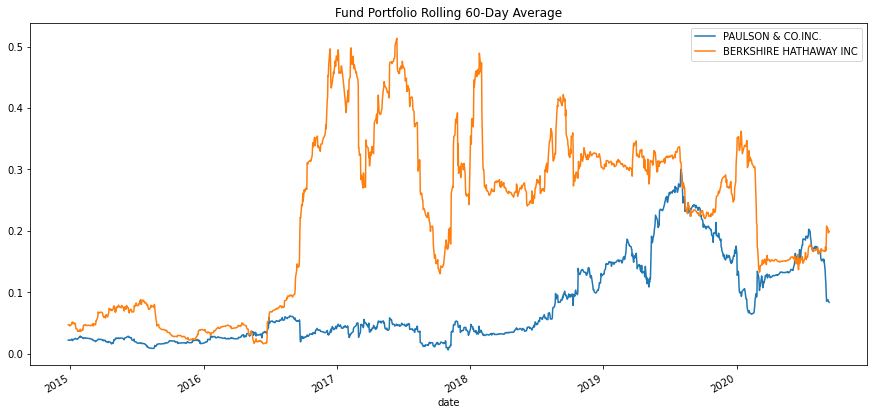

In [27]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
beta_portfolios_roll60.plot(figsize=(15,7), title="Fund Portfolio Rolling 60-Day Average");


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Berkshire Hathaway Inc appears to be more sensitive to movements in the S&P 500.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Out of the two compared above, Berkshire Hathaway is a better recommendation for inclusion in my firm's suite of fund offerings. This is due to a combination of its relatively high Sharpe ratio, total cummulative returns, and higher overall beta. Although its beta is more sensitive to market movements than Paulson & Co. Inc., its beta is consistently higher and closer to 1.0 which suggests a potential return value closer to the overall market (S&P 500).


---